In [1]:
import sklearn
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.data.shape)

(150, 4)


In [3]:
print(iris.data[0:5])
print(iris.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


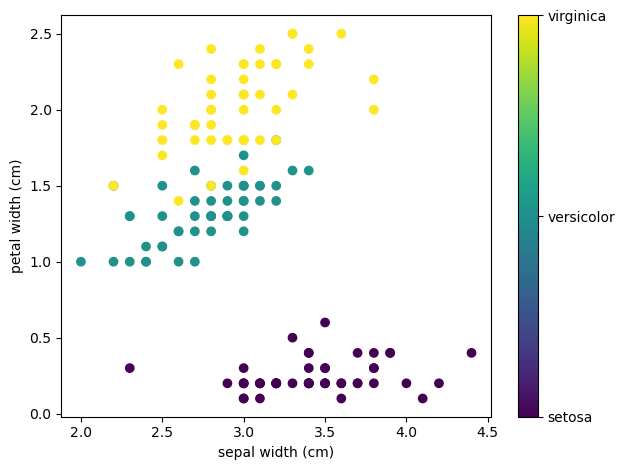

In [29]:
# The indices of the features that we are plotting
x_index = 1
y_index = 3

# formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure()
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

In [10]:
# Instantiate the kNN model
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])

['virginica']


(4.180808080808081, 8.019191919191918, 1.8868686868686868, 4.513131313131313)

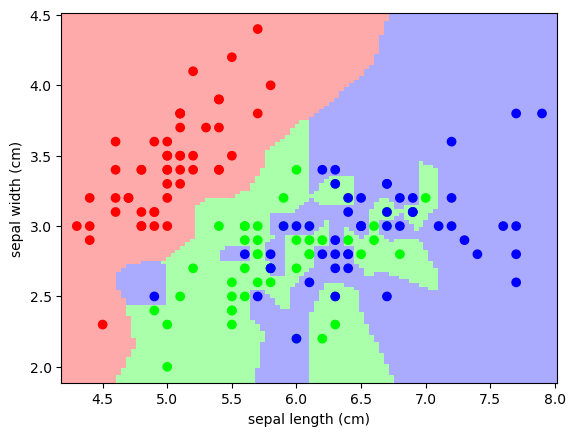

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                    # avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

In [15]:
from sklearn.linear_model import LogisticRegression
X, y = iris.data, iris.target
logit = LogisticRegression(multi_class='auto', solver='liblinear')
logit.fit(X, y)
# As before: What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[logit.predict([[3, 5, 4, 2]])])

['virginica']


In [16]:
from sklearn.model_selection import train_test_split
X, y = iris.data, iris.target
print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (150, 4)
y shape: (150,)


In [17]:
# Split into training / testing sets. 
# can specify the proportion we want in each set using the train_size and/or test_size parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4)
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (90, 4)
X_test shape: (60, 4)
y_train shape: (90,)
y_test shape: (60,)


In [18]:
# Instantiate and train our models
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
logit = LogisticRegression(multi_class='auto',solver='liblinear')
logit.fit(X_train, y_train)

# Evaluate our models
knn_score = knn.score(X_test, y_test)
logit_score = logit.score(X_test, y_test)
print('kNN accuracy: {}'.format(knn_score))
print('logit accuracy: {}'.format(logit_score))

if(knn_score > logit_score):
    print('knn performs better!')
else:
    print('logit performs better!')

kNN accuracy: 0.95
logit accuracy: 0.9666666666666667
logit performs better!


In [19]:
# Import cross validation function:
from sklearn.model_selection import cross_val_score
# Create the classifier:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4)
logit = LogisticRegression(multi_class='auto', solver='liblinear')
logit_scores = cross_val_score(logit, X_train, y_train, cv=5)
print('Logit cross-validation scores: {}'.format(logit_scores))
print('Mean: {}'.format(np.mean(logit_scores)))
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn_scores = cross_val_score(knn, X_train, y_train, cv=5)
print('knn cross-validation scores: {}'.format(knn_scores))
print('Mean: {}'.format(np.mean(knn_scores)))

Logit cross-validation scores: [0.88888889 0.94444444 0.94444444 1.         0.94444444]
Mean: 0.9444444444444444
knn cross-validation scores: [0.94444444 0.88888889 0.94444444 0.88888889 0.94444444]
Mean: 0.9222222222222222


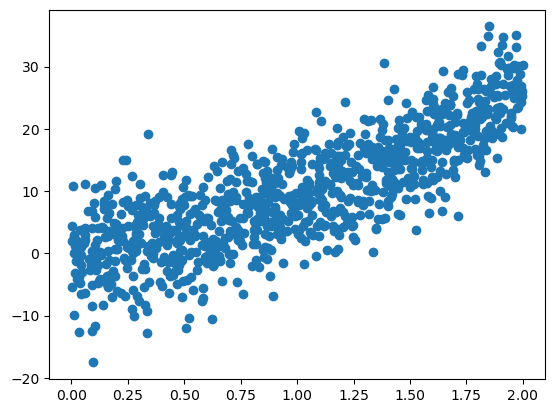

In [27]:
# From: http://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_bias_variance.html
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
# Generate some synthetic data
def generating_func(x, err=5):
    return np.random.normal(np.power(x+1, 3), err)
X = 2*np.random.random(1000)
y = generating_func(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
plt.figure()
plt.scatter(X, y)

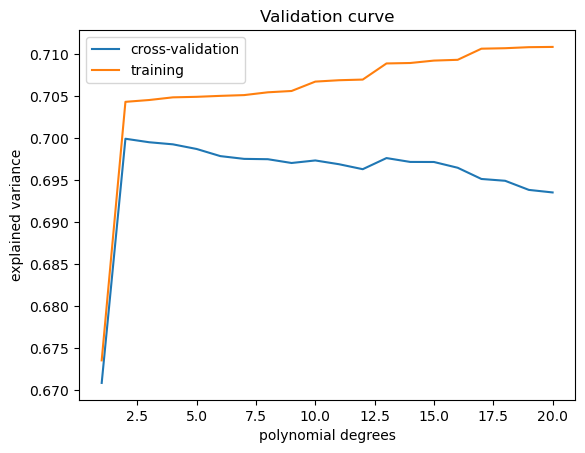

In [26]:
# Fit polynomials of increasing degrees:
from sklearn.model_selection import validation_curve
degrees = np.arange(1, 21)
model = make_pipeline(PolynomialFeatures(), LinearRegression())

# Vary the "degrees" on the pipeline step "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                model, X[:, np.newaxis], y,
                param_name='polynomialfeatures__degree',
                param_range=degrees)

# Plot the mean train score and validation score across folds
plt.plot(degrees, validation_scores.mean(axis=1), label='cross-validation')  
plt.plot(degrees, train_scores.mean(axis=1), label='training')  
plt.legend(loc='best') 
plt.xlabel('polynomial degrees')
plt.ylabel('explained variance')
plt.title('Validation curve');

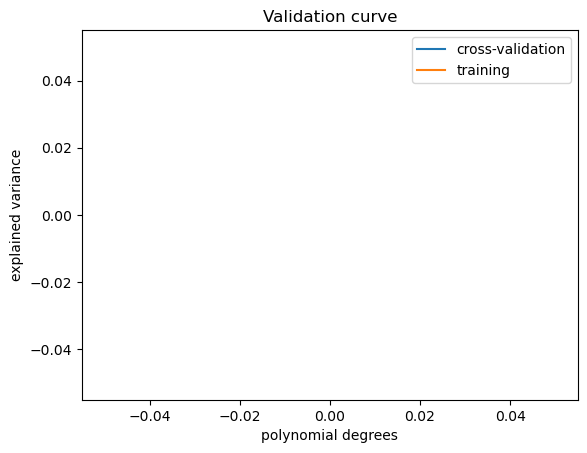

In [31]:
from sklearn.linear_model import Ridge
degrees = np.arange(1, 21)
model = make_pipeline(PolynomialFeatures(), Ridge(alpha=1))

# Vary the "degrees" on the pipeline step "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                model, X[:, np.newaxis], y,
                param_name='polynomialfeatures__degree',
                param_range=degrees)
# Plot the mean train score and validation score across folds
plt.plot(degrees, validation_scores.mean(axis=1), label='cross-validation')  
plt.plot(degrees, train_scores.mean(axis=1), label='training')  
plt.legend(loc='best') 
plt.xlabel('polynomial degrees')
plt.ylabel('explained variance')
plt.title('Validation curve');